# 3.Classification

## 3.1 Churn prediction

### Binary classification
This lab is about classification model to predict customer who will churn in the future.

The model will predict a likelihood of customer who will churn.

Use case:
- give a discount to customers who will churn to keep them

*We need to be accurate because we don't want to offer discounts to people who will still stay with our company anyway.

We need to change the target values to numeric. so, we will give 1 to value that we are interested to.
example :
- Churn prediction : 1 to churn (Positive) , 0 to not Churn (Negative)
- Spam prediction : 1 to Spam (Positive) , 0 to not Spam (Negative)

output :
- The output of model will be between 0 - 1. It's likelihood of Positive value

![](./image/Churn1.JPG)

## 3.2 Data preparation

In [247]:
import pandas as pd
import numpy as np
import seaborn as sns 

import matplotlib.pyplot as plt

In [248]:
#!wget 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [249]:
df = pd.read_csv("data-week-3.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [250]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


Some of data is lower and upper. It need to change to lowercase.

In [251]:
df.columns = df.columns.str.lower().str.replace(' ',"_")

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')

In [252]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [253]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

The ${totalcharges}$ column needs to be changed to numberic.

I put errors parameter because 

some of data point is '-' so 'coerce' will changes it to null.

In [254]:
df.totalcharges.isnull().sum()

0

In [255]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce')

In [256]:
df.totalcharges.isnull().sum()

11

In [257]:
df.totalcharges = df.totalcharges.fillna(0)

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [259]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [260]:
df.churn = (df.churn == "yes").astype(int)

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


## 3.3 Setting up the validation framwork
- It like previous project linear regresion but I will use sklearn for this time.

![](./image/3.3%20setup%20validation.JPG)

In [262]:
from sklearn.model_selection import train_test_split

In [263]:
df_full_train , df_test = train_test_split(df , test_size = 0.2 , random_state= 1)

In [264]:
len(df_full_train) , len(df_test)

(5634, 1409)

As I split from df to df_full_train 80% and df_val need 20% of all. 

So I will split 20%/80%. It's 25%

In [265]:
df_train , df_val = train_test_split(df_full_train , test_size = 0.25 , random_state= 1)

In [266]:
len(df_train) , len(df_val) , len(df_test)

(4225, 1409, 1409)

In [267]:
df_train.reset_index(inplace= True , drop = True)
df_val.reset_index(inplace= True , drop = True)
df_test.reset_index(inplace= True , drop = True)

In [268]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

## 3.4 EDA
- Check missing values
- Look at the target variable (churn)
- Look at numerical and catagorical variables

In [269]:
df_full_train = df_full_train.reset_index(drop = True)

In [270]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [271]:
df_full_train.churn.value_counts(normalize = True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [272]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate,2)

0.27

In [273]:
df_full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   seniorcitizen     5634 non-null   int64  
 3   partner           5634 non-null   object 
 4   dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   phoneservice      5634 non-null   object 
 7   multiplelines     5634 non-null   object 
 8   internetservice   5634 non-null   object 
 9   onlinesecurity    5634 non-null   object 
 10  onlinebackup      5634 non-null   object 
 11  deviceprotection  5634 non-null   object 
 12  techsupport       5634 non-null   object 
 13  streamingtv       5634 non-null   object 
 14  streamingmovies   5634 non-null   object 
 15  contract          5634 non-null   object 
 16  paperlessbilling  5634 non-null   object 


In [274]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [275]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.5 Feature importance: Churn rate and risk ratio
Feature importance analysis (part of EDA)

- Churn rate
- Risk ratio
- Mutuak infomation - later

**Churn rate**

In [276]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()

In [277]:
global_churn_rate, churn_male, churn_female

(0.26996805111821087, 0.2632135306553911, 0.27682403433476394)

In [278]:
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [279]:
df_full_train.gender

0         male
1       female
2         male
3         male
4         male
         ...  
5629      male
5630      male
5631      male
5632      male
5633    female
Name: gender, Length: 5634, dtype: object

**risk ratio**

--------------------Column : gender------------------------------
global_churn_rate : 0.26996805111821087
----------------
diff_threshold : <  -0.02 | risk_threshold : >  1.1
----------------
female  :  0.27682403433476394
diff : -0.006855983216553063  :  less likely to churn
risk : 1.0253955354648652  :  less likely to churn
----------------
male  :  0.2632135306553911
diff : 0.006754520462819769  :  less likely to churn
risk : 0.9749802969838747  :  less likely to churn


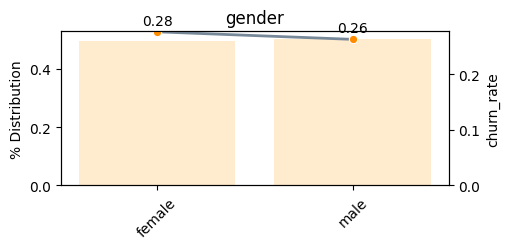

--------------------Column : seniorcitizen------------------------------
global_churn_rate : 0.26996805111821087
----------------
diff_threshold : <  -0.02 | risk_threshold : >  1.1
----------------
0  :  0.24227022448115204
diff : 0.02769782663705883  :  less likely to churn
risk : 0.8974033167171667  :  less likely to churn
----------------
1  :  0.4133771929824561
diff : -0.14340914186424525  :  more likely to churn
risk : 1.5312078272604588  :  more likely to churn


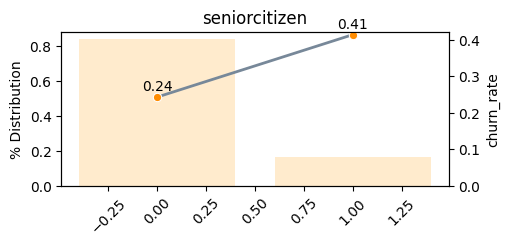

--------------------Column : partner------------------------------
global_churn_rate : 0.26996805111821087
----------------
diff_threshold : <  -0.02 | risk_threshold : >  1.1
----------------
no  :  0.3298090040927694
diff : -0.05984095297455855  :  more likely to churn
risk : 1.2216593879412643  :  more likely to churn
----------------
yes  :  0.20503330866025166
diff : 0.06493474245795922  :  less likely to churn
risk : 0.7594724924338315  :  less likely to churn


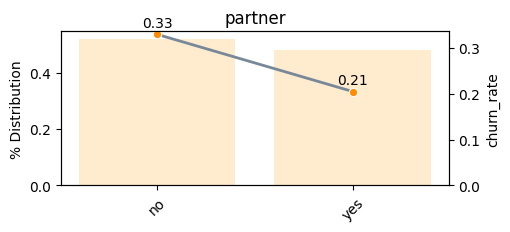

--------------------Column : dependents------------------------------
global_churn_rate : 0.26996805111821087
----------------
diff_threshold : <  -0.02 | risk_threshold : >  1.1
----------------
no  :  0.3137600806451613
diff : -0.04379202952695044  :  more likely to churn
risk : 1.162211896354266  :  more likely to churn
----------------
yes  :  0.16566626650660263
diff : 0.10430178461160824  :  less likely to churn
risk : 0.6136513777108475  :  less likely to churn


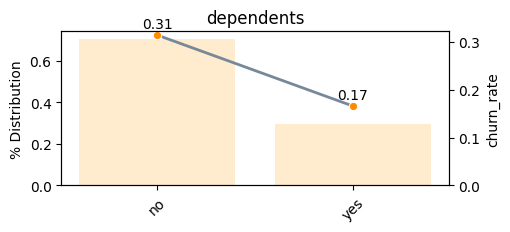

--------------------Column : phoneservice------------------------------
global_churn_rate : 0.26996805111821087
----------------
diff_threshold : <  -0.02 | risk_threshold : >  1.1
----------------
no  :  0.2413162705667276
diff : 0.028651780551483264  :  less likely to churn
risk : 0.8938697359453933  :  less likely to churn
----------------
yes  :  0.2730489482995872
diff : -0.0030808971813763297  :  less likely to churn
risk : 1.011412080683678  :  less likely to churn


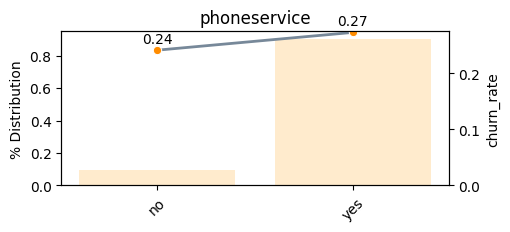

--------------------Column : multiplelines------------------------------
global_churn_rate : 0.26996805111821087
----------------
diff_threshold : <  -0.02 | risk_threshold : >  1.1
----------------
no  :  0.2574074074074074
diff : 0.012560643710803454  :  less likely to churn
risk : 0.9534735919351304  :  less likely to churn
----------------
no_phone_service  :  0.2413162705667276
diff : 0.028651780551483264  :  less likely to churn
risk : 0.8938697359453933  :  less likely to churn
----------------
yes  :  0.29074151654796815
diff : -0.020773465429757276  :  more likely to churn
risk : 1.0769478660297518  :  less likely to churn


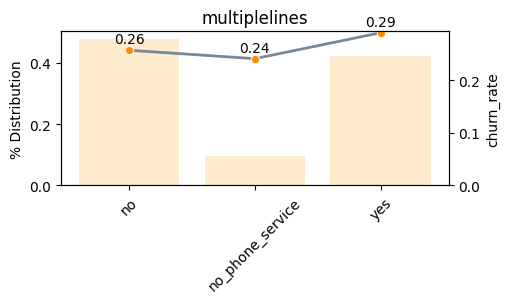

--------------------Column : internetservice------------------------------
global_churn_rate : 0.26996805111821087
----------------
diff_threshold : <  -0.02 | risk_threshold : >  1.1
----------------
dsl  :  0.1923474663908997
diff : 0.07762058472731118  :  less likely to churn
risk : 0.7124823311284213  :  less likely to churn
----------------
fiber_optic  :  0.42517144009681324
diff : -0.15520338897860236  :  more likely to churn
risk : 1.5748953934947045  :  more likely to churn
----------------
no  :  0.07780507780507781
diff : 0.19216297331313306  :  less likely to churn
risk : 0.28820105743182667  :  less likely to churn


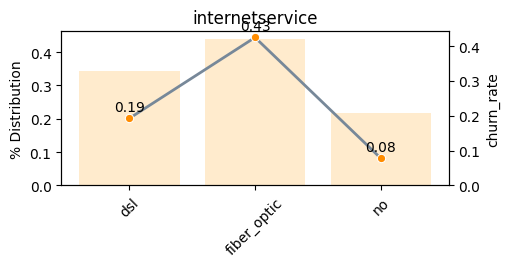

--------------------Column : onlinesecurity------------------------------
global_churn_rate : 0.26996805111821087
----------------
diff_threshold : <  -0.02 | risk_threshold : >  1.1
----------------
no  :  0.42092109960728313
diff : -0.15095304848907226  :  more likely to churn
risk : 1.5591515287228357  :  more likely to churn
----------------
no_internet_service  :  0.07780507780507781
diff : 0.19216297331313306  :  less likely to churn
risk : 0.28820105743182667  :  less likely to churn
----------------
yes  :  0.1532258064516129
diff : 0.11674224466659797  :  less likely to churn
risk : 0.5675701469746135  :  less likely to churn


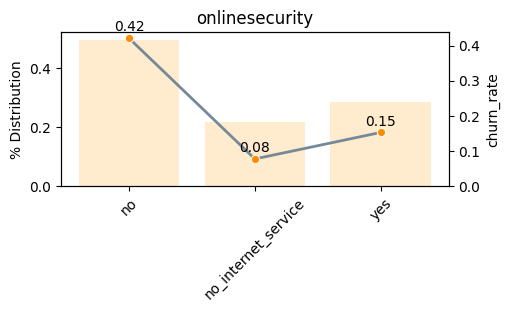

--------------------Column : onlinebackup------------------------------
global_churn_rate : 0.26996805111821087
----------------
diff_threshold : <  -0.02 | risk_threshold : >  1.1
----------------
no  :  0.4043234587670136
diff : -0.13435540764880272  :  more likely to churn
risk : 1.4976715099890563  :  more likely to churn
----------------
no_internet_service  :  0.07780507780507781
diff : 0.19216297331313306  :  less likely to churn
risk : 0.28820105743182667  :  less likely to churn
----------------
yes  :  0.21723237597911227
diff : 0.0527356751390986  :  less likely to churn
risk : 0.8046595701948182  :  less likely to churn


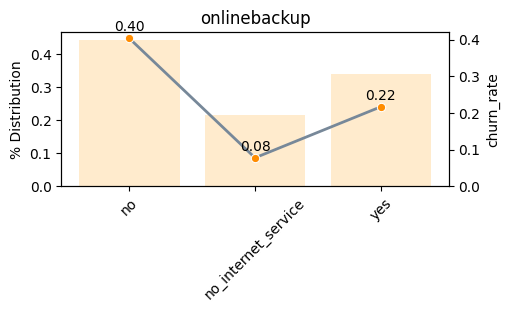

--------------------Column : deviceprotection------------------------------
global_churn_rate : 0.26996805111821087
----------------
diff_threshold : <  -0.02 | risk_threshold : >  1.1
----------------
no  :  0.3958754549130611
diff : -0.12590740379485021  :  more likely to churn
risk : 1.4663789039974926  :  more likely to churn
----------------
no_internet_service  :  0.07780507780507781
diff : 0.19216297331313306  :  less likely to churn
risk : 0.28820105743182667  :  less likely to churn
----------------
yes  :  0.2304123711340206
diff : 0.03955567998419027  :  less likely to churn
risk : 0.8534801439638869  :  less likely to churn


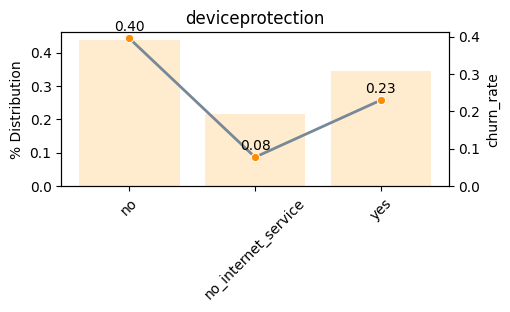

--------------------Column : techsupport------------------------------
global_churn_rate : 0.26996805111821087
----------------
diff_threshold : <  -0.02 | risk_threshold : >  1.1
----------------
no  :  0.41891405969075873
diff : -0.14894600857254786  :  more likely to churn
risk : 1.5517171678486092  :  more likely to churn
----------------
no_internet_service  :  0.07780507780507781
diff : 0.19216297331313306  :  less likely to churn
risk : 0.28820105743182667  :  less likely to churn
----------------
yes  :  0.15992647058823528
diff : 0.11004158052997559  :  less likely to churn
risk : 0.5923903585102679  :  less likely to churn


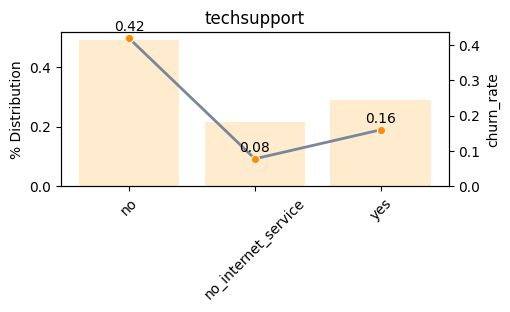

--------------------Column : streamingtv------------------------------
global_churn_rate : 0.26996805111821087
----------------
diff_threshold : <  -0.02 | risk_threshold : >  1.1
----------------
no  :  0.3428317008014248
diff : -0.0728636496832139  :  more likely to churn
risk : 1.269897305927171  :  more likely to churn
----------------
no_internet_service  :  0.07780507780507781
diff : 0.19216297331313306  :  less likely to churn
risk : 0.28820105743182667  :  less likely to churn
----------------
yes  :  0.3027226580526073
diff : -0.03275460693439641  :  more likely to churn
risk : 1.1213277156268175  :  more likely to churn


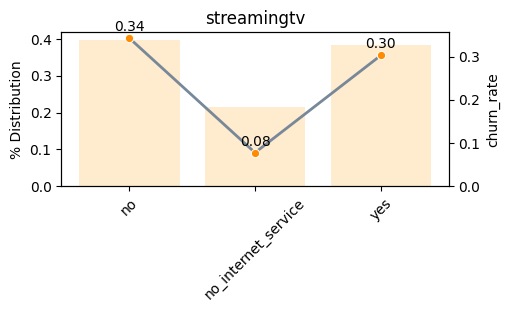

--------------------Column : streamingmovies------------------------------
global_churn_rate : 0.26996805111821087
----------------
diff_threshold : <  -0.02 | risk_threshold : >  1.1
----------------
no  :  0.33890646181653866
diff : -0.06893841069832779  :  more likely to churn
risk : 1.2553576632967645  :  more likely to churn
----------------
no_internet_service  :  0.07780507780507781
diff : 0.19216297331313306  :  less likely to churn
risk : 0.28820105743182667  :  less likely to churn
----------------
yes  :  0.30727272727272725
diff : -0.03730467615451638  :  more likely to churn
risk : 1.138181818181818  :  more likely to churn


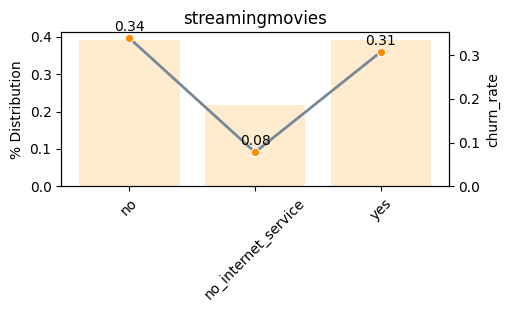

--------------------Column : contract------------------------------
global_churn_rate : 0.26996805111821087
----------------
diff_threshold : <  -0.02 | risk_threshold : >  1.1
----------------
month-to-month  :  0.43170103092783507
diff : -0.1617329798096242  :  more likely to churn
risk : 1.5990819252119808  :  more likely to churn
----------------
one_year  :  0.1205733558178752
diff : 0.14939469530033567  :  less likely to churn
risk : 0.4466208327928395  :  less likely to churn
----------------
two_year  :  0.028273809523809524
diff : 0.24169424159440134  :  less likely to churn
risk : 0.10473020569174415  :  less likely to churn


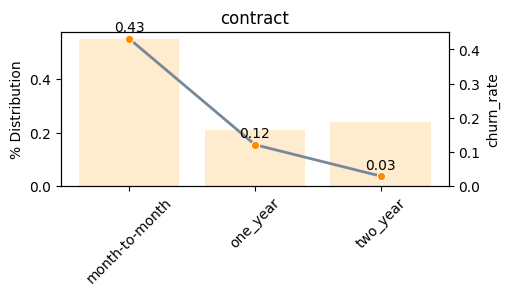

--------------------Column : paperlessbilling------------------------------
global_churn_rate : 0.26996805111821087
----------------
diff_threshold : <  -0.02 | risk_threshold : >  1.1
----------------
no  :  0.17207090358841332
diff : 0.09789714752979756  :  less likely to churn
risk : 0.6373750629961346  :  less likely to churn
----------------
yes  :  0.3381511592893707
diff : -0.0681831081711598  :  more likely to churn
risk : 1.2525599154742368  :  more likely to churn


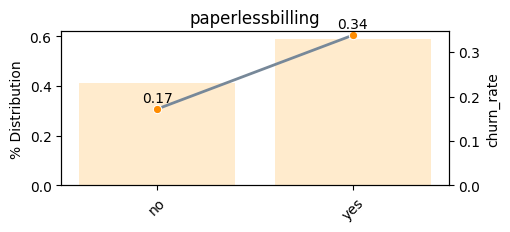

--------------------Column : paymentmethod------------------------------
global_churn_rate : 0.26996805111821087
----------------
diff_threshold : <  -0.02 | risk_threshold : >  1.1
----------------
bank_transfer_(automatic)  :  0.1681706316652994
diff : 0.10179741945291146  :  less likely to churn
risk : 0.6229279019081505  :  less likely to churn
----------------
credit_card_(automatic)  :  0.16433853738701726
diff : 0.10562951373119361  :  less likely to churn
risk : 0.6087332804986556  :  less likely to churn
----------------
electronic_check  :  0.45589012150026414
diff : -0.18592207038205327  :  more likely to churn
risk : 1.6886817518293806  :  more likely to churn
----------------
mailed_check  :  0.19386973180076628
diff : 0.0760983193174446  :  less likely to churn
risk : 0.7181210183862703  :  less likely to churn


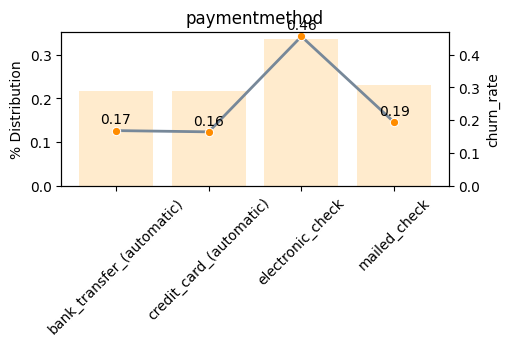

In [280]:
diff_threshold = -0.02
risk_threshold = 1.1
# print(f"if diff < {diff_threshold} then more likely to churn")
# print(f"if risk > {risk_threshold} then more likely to churn")
for c in categorical:
    print(f"--------------------Column : {c}------------------------------")
    print("global_churn_rate :" , global_churn_rate)
    print("----------------")
    data = df_full_train[[c,'churn']].copy()

    df_group = df_full_train[[c,'churn']].groupby(c).agg(churn_rate = ('churn','mean'),
                                                        dist = (c,lambda x : len(x)/len(df_full_train)))

    print("diff_threshold : < ", diff_threshold, "|" , "risk_threshold : > ", risk_threshold)                                                    
    for i , row in df_group.iterrows():
        diff = "more likely to churn" if global_churn_rate - row['churn_rate'] < diff_threshold else "less likely to churn"
        risk = "more likely to churn" if row['churn_rate']/global_churn_rate > risk_threshold else "less likely to churn"
        print("----------------")
        print(i, " : ", row['churn_rate'])
        print("diff :" , global_churn_rate - row['churn_rate'] , " : " , diff)
        print("risk :" , row['churn_rate']/global_churn_rate , " : " , risk)
        
    df_group = df_group.reset_index()
    x = df_group[c]

    y1 = df_group['dist']
    y2 = df_group['churn_rate']

    fig, ax1  = plt.subplots(figsize=(5,2))
    
    plt.tick_params(axis='x', rotation = 45)

    plt.title(c)
    ax1.bar(x,y1, data = df_group, color='navajowhite', alpha=.6)
    ax1.set_ylabel('% Distribution')

    ax2 = ax1.twinx()
    ax2 = sns.lineplot(x = x,y =  y2, data = df_group, marker='o',\
                    markerfacecolor='darkorange', markersize=6, color='lightslategray', 
                    linewidth=2)
    ax2.set_ylim(bottom=0)
    
    for x,y in zip(x,y2):
            label = "{:.2f}".format(y)
            plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,5), ha='center', color='black') 
    plt.show()

## 3.6 Feature important: Mutual information

Mutaul information - concept from information theory

In [281]:
from sklearn.metrics import mutual_info_score

In [282]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [283]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending = False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## 3.7 Feature important: Corralation coefficient

![](./image/3.7%20correlation.JPG)

In [284]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [285]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [286]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [287]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

![](./image/3.7%20correlation2.JPG)

## 3.8 One-hot encoding
- Use Scikit-Learn to encode categorical features

![](./image/3.8%20one-hot.JPG)

In [288]:
from sklearn.feature_extraction import DictVectorizer

In [289]:
train_dicts = df_train[categorical + numerical].to_dict(orient = 'records')

In [290]:
dv = DictVectorizer(sparse= False)
X_train = dv.fit_transform(train_dicts)

In [291]:
X_train.shape

(4225, 45)

In [292]:
val_dicts = df_val[categorical + numerical].to_dict(orient = 'records')
X_val = dv.transform(val_dicts)

In [293]:
test_dicts = df_test[categorical + numerical].to_dict(orient = 'records')
X_test = dv.transform(test_dicts)

## 3.9 Logistic Regression

- Binary classification
- Linear vvs logistic regression

In [294]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [295]:
z = np.linspace(-7, 7, 51)

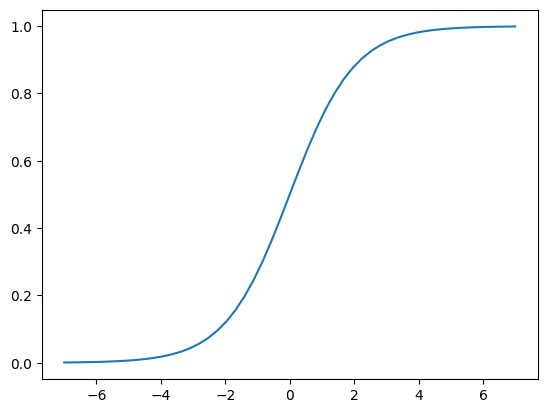

In [296]:
plt.plot(z,sigmoid(z))

In [297]:
def linear_regression(xi):
    result = w0

    for j in range(len(w)):
        result = result + xi[j] + w[j]

    return result

In [298]:
def logistic_regression(xi):
    score = w0

    for j in range(len(w)):
        score = score + xi[j] + w[j]
    
    result = sigmoid(score)
    
    return result

## 3.10 Training logistic regression with Scikit-Learn

- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [299]:
from sklearn.linear_model import LogisticRegression

In [300]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [301]:
model.intercept_[0]

-0.10906578491182971

In [302]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [303]:
y_pred = model.predict_proba(X_val)[:, 1]

In [304]:
churn_decision = (y_pred >= 0.5)

In [305]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [306]:
(y_val == churn_decision).mean()

0.8034066713981547

In [307]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [308]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [309]:
df_pred

,probability,prediction,actual,correct
0,0.009004,0,0,True
1,0.204424,0,0,True
2,0.212118,0,0,True
3,0.543022,1,1,True
4,0.213687,0,0,True
...,...,...,...,...
1404,0.313851,0,0,True
1405,0.039386,0,1,False
1406,0.136412,0,0,True
1407,0.799754,1,1,True


## 3.11 Model interpretation

In [310]:
a = [1, 2, 3, 4]
b = 'abcd'

In [311]:
dict(zip(a,b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [312]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [313]:
small = ['contract','tenure','monthlycharges']

In [314]:
df_train[small].head(10).to_dict(orient = 'records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [315]:
dicts_train_small = df_train[small].to_dict(orient = 'records')
dicts_val_small = df_val[small].to_dict(orient = 'records')

In [316]:
dv_small = DictVectorizer(sparse = False)
X_train_small = dv_small.fit_transform(dicts_train_small)

In [317]:
X_val_small = dv_small.transform(dicts_val_small)

In [318]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [319]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [320]:
w0 = model_small.intercept_[0]
w0

-2.4767756666738703

In [321]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [322]:
dict(zip(dv_small.get_feature_names_out(),w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [323]:
-2.47 + (-0.949) + 30 * 0.027 + 24 * (-0.036)

-3.473

In [324]:
sigmoid(_)

0.030090303318277657

## 3.12 Using the model

In [325]:
dicts_df_full_train = df_full_train[categorical + numerical].to_dict(orient = 'records')

In [333]:
dv = DictVectorizer(sparse = False)
X_full_train = dv.fit_transform(dicts_df_full_train)

In [336]:
y_full_train = df_full_train.churn

In [337]:
model = LogisticRegression()
model.fit(X_full_train,y_full_train)

LogisticRegression()

In [344]:
dicts_df_test = df_test[categorical + numerical].to_dict(orient = 'records')

In [345]:
X_test = dv.transform(dicts_df_test)

In [347]:
y_pred = model.predict_proba(X_test)[:,1]

In [349]:
churn_decision = (y_pred >= 0.5)

In [351]:
(churn_decision == y_test).mean()

0.815471965933286

In [350]:
df_test[churn_decision]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3,8601-qacrs,female,0,no,no,5,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,50.60,249.95,1
7,8720-rqsbj,male,1,no,no,1,yes,no,dsl,no,...,no,no,no,no,month-to-month,no,electronic_check,44.00,44.00,0
12,6168-wfvvf,female,1,no,no,3,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.30,235.50,1
30,6402-zfppi,female,1,no,no,25,yes,yes,fiber_optic,yes,...,no,no,yes,yes,month-to-month,yes,mailed_check,102.80,2660.20,1
35,0362-zbzwj,male,0,no,no,36,yes,yes,fiber_optic,no,...,no,no,no,yes,month-to-month,yes,electronic_check,84.90,3067.20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,1157-bqcuw,male,0,no,no,1,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,74.95,74.95,1
1392,5134-ikday,female,0,yes,yes,1,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,69.80,69.80,1
1395,4910-aqffx,male,0,yes,yes,9,yes,yes,fiber_optic,no,...,yes,no,no,no,month-to-month,yes,bank_transfer_(automatic),79.35,661.25,1
1403,2215-zafgx,male,0,no,no,9,yes,yes,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,85.50,791.70,0


In [393]:
customer = dicts_df_test[12]

In [394]:
X_small = dv.transform(customer)

In [395]:
model.predict_proba(X_small)[:, 1]

array([0.75877652])

In [397]:
y_test[12]

1

![](./image/3.12%20churn.JPG)

## 3.13 Summary

- Feature important - risk, mutual information, correlation
- One-hot encoding can be implemented with DictVectorizer
- Logistic regression - linear with sigmoid
- Output of log reg - probabillity
- Interpretation of weights is similar to linear regression